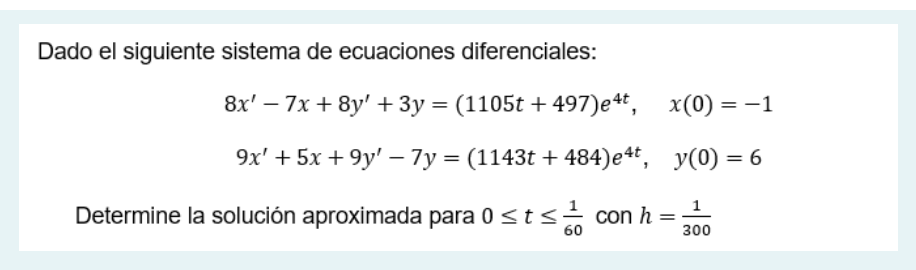

Ocupo operadores diferenciales para plantear las ecuaciones
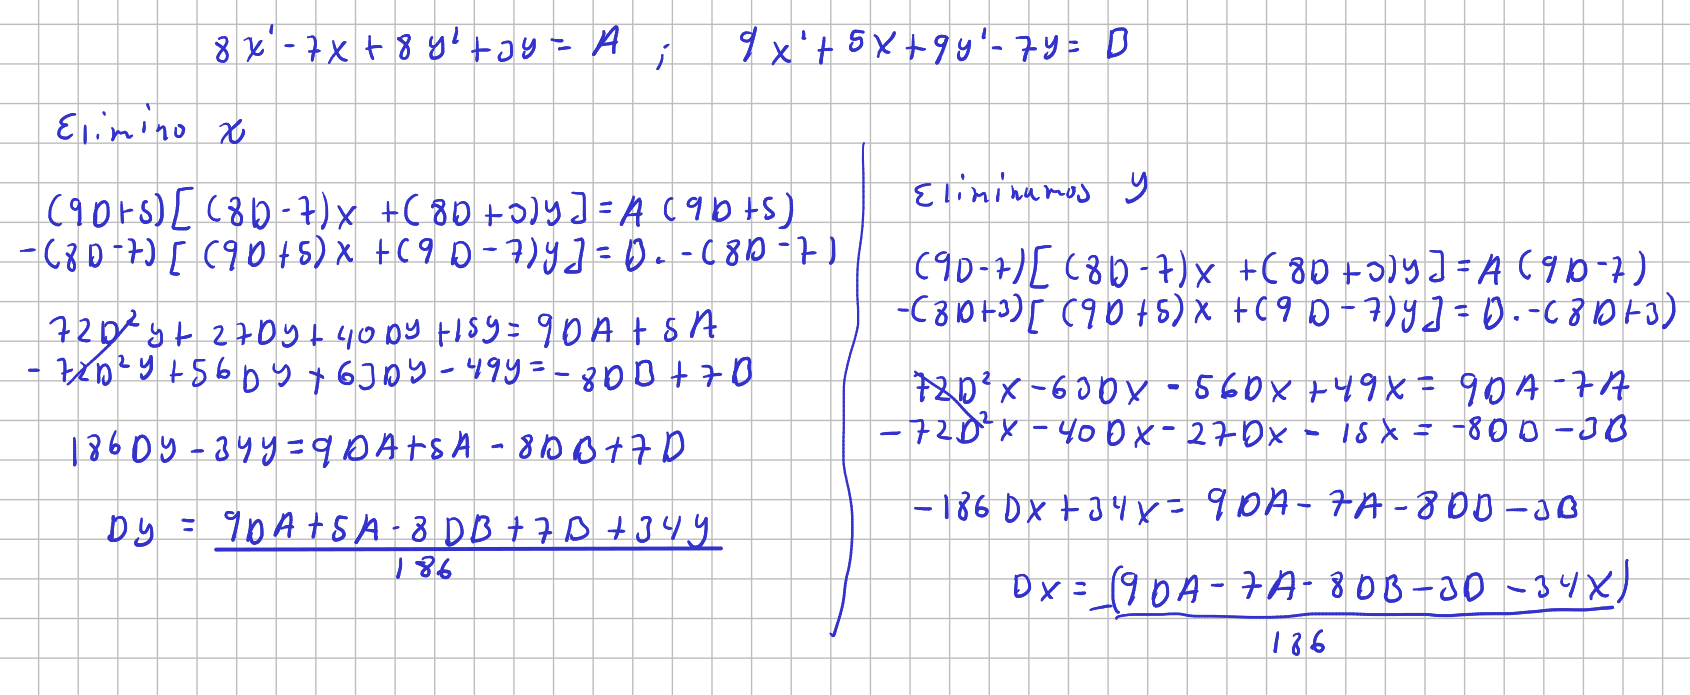


In [13]:
from sympy import *

# Declaramos las variable a utilizar
x, y, t= symbols("x y t")

h= 1/300

# Ingresamos nuestras funciones A y B
A = (1105*t + 497)*exp(4*t)
B = (1143*t + 484)*exp(4*t)

# Ahora pasamos el despeje de Dx y Dy en dos funcios F y G
f = -(9 * A.diff() - 7*A - 8 * B.diff() - 3*B - 34*x) / 186
g = (5*A + 9*A.diff() - 8*B.diff() + 7*B + 34*y) / 186

display(f)
display(g)

17*x/93 - 29*(1105*t + 497)*exp(4*t)/186 + 35*(1143*t + 484)*exp(4*t)/186 - 267*exp(4*t)/62

17*y/93 + 41*(1105*t + 497)*exp(4*t)/186 - 25*(1143*t + 484)*exp(4*t)/186 + 267*exp(4*t)/62

In [14]:
from numpy import arange
# creamos nuestro intervalo
T = [t for t in arange(start=0, stop=1/60 + h/2,step=h)]
T

[0.0,
 0.0033333333333333335,
 0.006666666666666667,
 0.01,
 0.013333333333333334,
 0.016666666666666666]

In [15]:
# Ahora vamos a generar todas nuestras K y T

# Declaro la lista con x(0) = -1, y(0)=6

X = [-1]
Y = [6]
K11 = [0]
K12 = [0]
K21 = [0]
K22 = [0]
K31 = [0]
K32 = [0]
K41 = [0]
K42 = [0]

# Hago un for para aplicar la fórmula
for i in range(1, len(T)):
    k11 = f.subs({t: T[i-1], x: X[i-1]})
    k12 = g.subs({t: T[i-1], y: Y[i-1]})
    k21 = f.subs({t: T[i-1] + 0.5*h, x: X[i-1] + (k11*h)/2})
    k22 = g.subs({t: T[i-1] + 0.5*h, y: Y[i-1] + (k12*h)/2})
    k31 = f.subs({t: T[i-1] + 0.5*h, x: X[i-1] + (k21*h)/2})
    k32 = g.subs({t: T[i-1] + 0.5*h, y: Y[i-1] + (k22*h)/2})
    k41 = f.subs({t: T[i-1] + h, x: X[i-1] + k31*h})
    k42 = g.subs({t: T[i-1] + h, y: Y[i-1] + k32*h})
    K11.append(k11)
    K12.append(k12)
    K21.append(k21)
    K22.append(k22)
    K31.append(k31)
    K32.append(k32)
    K41.append(k41)
    K42.append(k42)
    X.append(float(X[i-1] + (h/6)*(k11+2*k21+2*k31+k41)))
    Y.append(float(Y[i-1] + (h/6)*(k12+2*k22+2*k32+k42)))


display(X)
display(Y)

[-1,
 -0.9692210786815185,
 -0.9375168178457602,
 -0.9048679712978146,
 -0.8712549429195878,
 -0.8366577807435736]

[6,
 6.16798868757686,
 6.339305435690637,
 6.5140092596122585,
 6.692160159248561,
 6.873819134942468]

In [16]:
# Desplegamos en una tabla los resultados de las aproximaciones y las K
from utils import imprimir_tabla

# Primero una lista para los datos principales
lista_aproximaciones = [["ti", "Yi", "Xi"]]

for i in range(len(T)):
    lista_aproximaciones.append(
        [
            str(float(T[i])),
            str(float(X[i])),
            str(float(Y[i]))
        ]
    )

# Ahora una lista de las K de x
lista_k1 = [["k11", "k21", "k31", "k41"]]

for i in range(len(T)):
    lista_k1.append(
        [
            str(float(K11[i])),
            str(float(K21[i])),
            str(float(K31[i])),
            str(float(K41[i]))
        ]
    )

# Finalmente una lista de las K de y
lista_k2 = [["k12", "k22", "k32", "k42"]]

for i in range(len(T)):
    lista_k2.append(
        [
            str(float(K12[i])),
            str(float(K22[i])),
            str(float(K32[i])),
            str(float(K42[i]))
        ]
    )

print("Tabla de aproximaciones")
imprimir_tabla(lista_aproximaciones)

print("Tabla de k para x")
imprimir_tabla(lista_k1)

print("Tabla de k para y")
imprimir_tabla(lista_k2)

Tabla de aproximaciones


┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ ti                    ┃ Yi                  ┃ Xi                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0.0                   │ -1.0                │ 6.0                │
│ 0.0033333333333333335 │ -0.9692210786815185 │ 6.16798868757686   │
│ 0.006666666666666667  │ -0.9375168178457602 │ 6.339305435690637  │
│ 0.01                  │ -0.9048679712978146 │ 6.5140092596122585 │
│ 0.013333333333333334  │ -0.8712549429195878 │ 6.692160159248561  │
│ 0.016666666666666666  │ -0.8366577807435736 │ 6.873819134942468  │
└───────────────────────┴─────────────────────┴────────────────────┘

Tabla de k para x


┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ k11                ┃ k21                ┃ k31                ┃ k41                ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0.0                │ 0.0                │ 0.0                │ 0.0                │
│ 9.096774193548388  │ 9.23341934436649   │ 9.23346097460957   │ 9.37152354176624   │
│ 9.371523673026308  │ 9.511016465334462  │ 9.51105896313857   │ 9.651994974392622  │
│ 9.651995108008716  │ 9.794387363997451  │ 9.79443074515071   │ 9.938292459997157  │
│ 9.938292596008877  │ 10.083637015994867 │ 10.083681296552928 │ 10.230521859703737 │
│ 10.230521998151321 │ 10.378872174814171 │ 10.378917371104551 │ 10.52879082683697  │
└────────────────────┴────────────────────┴────────────────────┴────────────────────┘

Tabla de k para y


┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ k12                ┃ k22                ┃ k32                ┃ k42                ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0.0                │ 0.0                │ 0.0                │ 0.0                │
│ 49.903225806451616 │ 50.395805779953    │ 50.395955849120554 │ 50.89288857374886  │
│ 50.892888970064526 │ 51.394210497896296 │ 51.394363230261405 │ 51.90011017841912  │
│ 51.9001105813032   │ 52.41031958045698  │ 52.41047502047464  │ 52.925183275752794 │
│ 52.925183685310216 │ 53.44442841501364  │ 53.444586607852436 │ 53.968405614303116 │
│ 53.96840603064045  │ 54.49683712894546  │ 54.4969981204987   │ 55.03007971950252  │
└────────────────────┴────────────────────┴────────────────────┴────────────────────┘